# B10 Fraunhofer single-slit diffraction
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/10/21

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from scipy.interpolate import Rbf
from scipy.signal import argrelextrema
from scipy.io import loadmat

In [2]:
a = 0.34
lam = 632.8e-6
D = 870

## Zoom
Ref: [https://blog.csdn.net/weixin_45826022/article/details/113486448](https://blog.csdn.net/weixin_45826022/article/details/113486448)

In [5]:
def zoom(ax,axins,zoom_left,zoom_right,x,y,linked='bottom', x_ratio=0.05,y_ratio=0.05):
                   
    """缩放内嵌图形，并且进行连线
    ax:         调用plt.subplots返回的画布。例如： fig,ax = plt.subplots(1,1)
    axins:      内嵌图的画布。 例如 axins = ax.inset_axes((0.4,0.1,0.4,0.3))
    zoom_left:  要放大区域的横坐标左端点的index
    zoom_right: 要放大区域的横坐标右端点的index
    x:          X轴标签
    y:          列表，所有y值
    linked:     进行连线的位置，{'bottom','top','left','right'}
    x_ratio:    X轴缩放比例
    y_ratio:    Y轴缩放比例
    """
    xlim_left = x[zoom_left]-(x[zoom_right]-x[zoom_left])*x_ratio
    xlim_right = x[zoom_right]+(x[zoom_right]-x[zoom_left])*x_ratio

    y_data = np.hstack([yi[zoom_left:zoom_right] for yi in y])
    ylim_bottom = np.min(y_data)-(np.max(y_data)-np.min(y_data))*y_ratio
    ylim_top = np.max(y_data)+(np.max(y_data)-np.min(y_data))*y_ratio

    axins.set_xlim(xlim_left, xlim_right)
    axins.set_ylim(ylim_bottom, ylim_top)

    ax.plot([xlim_left,xlim_right,xlim_right,xlim_left,xlim_left],
            [ylim_bottom,ylim_bottom,ylim_top,ylim_top,ylim_bottom]
            , color = 'grey', lw = 2, ls = ':', alpha = 0.8)

    if linked == 'bottom':
        xyA_1, xyB_1 = (xlim_left,ylim_top), (xlim_left,ylim_bottom)
        xyA_2, xyB_2 = (xlim_right,ylim_top), (xlim_right,ylim_bottom)
    elif  linked == 'top':
        xyA_1, xyB_1 = (xlim_left,ylim_bottom), (xlim_left,ylim_top)
        xyA_2, xyB_2 = (xlim_right,ylim_bottom), (xlim_right,ylim_top)
    elif  linked == 'left':
        xyA_1, xyB_1 = (xlim_right,ylim_top), (xlim_left,ylim_top)
        xyA_2, xyB_2 = (xlim_right,ylim_bottom), (xlim_left,ylim_bottom)
    elif  linked == 'right':
        xyA_1, xyB_1 = (xlim_left,ylim_top), (xlim_right,ylim_top)
        xyA_2, xyB_2 = (xlim_left,ylim_bottom), (xlim_right,ylim_bottom)
        
    con = ConnectionPatch(xyA=xyA_1,xyB=xyB_1,coordsA="data",
                          coordsB="data",axesA=axins,axesB=ax
                          , ls = ':', color = 'grey', lw = 2, alpha = 0.8)
    axins.add_artist(con)
    con = ConnectionPatch(xyA=xyA_2,xyB=xyB_2,coordsA="data",
                          coordsB="data",axesA=axins,axesB=ax
                          , ls = ':', color = 'grey', lw = 2, alpha = 0.8)
    axins.add_artist(con)

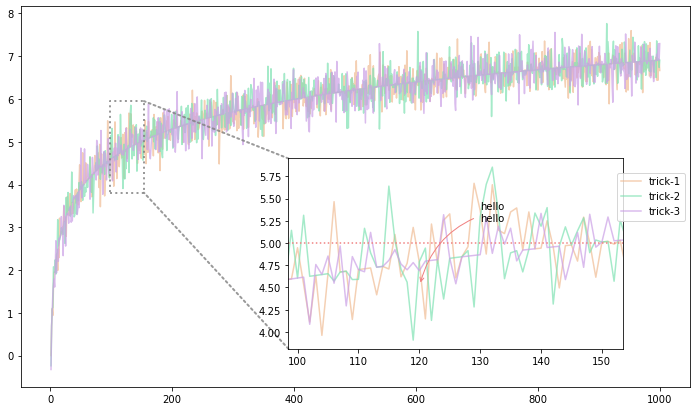

In [9]:
x = np.arange(1,1001)
for i in range(3):  
    y = np.log(x)  
    for idx in np.random.randint(0,1000,800):
        y[idx] += np.random.rand() - 0.5  
    locals()['y'+str(i)] = y

fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(x, y0, color='#f0bc94', label='trick-1', alpha=0.7)
ax.plot(x, y1, color='#7fe2b3', label='trick-2', alpha=0.7)
ax.plot(x, y2, color='#cba0e6', label='trick-3', alpha=0.7)
ax.legend(loc='right')

# 绘制缩放图
axins = ax.inset_axes((0.4, 0.1, 0.5, 0.5))

# 在缩放图中也绘制主图所有内容，然后根据限制横纵坐标来达成局部显示的目的
axins.plot(x,y0,color='#f0bc94',label='trick-1',alpha=0.7)
axins.plot(x,y1,color='#7fe2b3',label='trick-2',alpha=0.7)
axins.plot(x,y2,color='#cba0e6',label='trick-3',alpha=0.7)
axins.axhline(y = 5.0, ls=':', color='lightcoral')
axins.annotate(text='hello\nhello' , xy=(120, 4.5), xytext=(130, 5.25), arrowprops=dict(arrowstyle='->',
               color='lightcoral',
               shrinkA = 5,
               shrinkB = 5,
               connectionstyle="arc3,rad=0.3"))
# 局部显示并且进行连线
zoom(ax, axins, 100, 150, x , [y0,y1,y2], 'right')

## EXP1 Fraunhofer single-slit diffraction
/mm

In [20]:
df1 = pd.read_csv('B10-Data\diffraction.csv')
df1['x'] = df1['x'] - df1.iloc[0,0]
# df11 = df1.copy()
# df11['x'] = - df11['x']
# df1 = df1.append(df11)

C:\Users\12977\AppData\Local\Temp/ipykernel_7612/2850954005.py:3: RuntimeWarning: invalid value encountered in true_divide
  p_the = P0 * (np.sin(np.pi*a*x_dns/(D*lam)))**2 / (np.pi*a*x_dns/(D*lam))**2


Text(0.5, -0.18, 'Fig. 1.1 The theoretical curve of the Frauhofer single-slit diffraction experimrnt.')

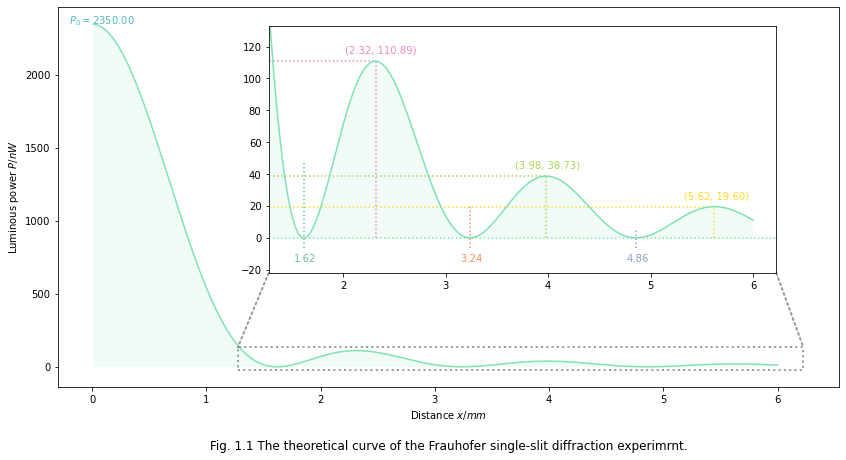

In [11]:
x_dns = np.linspace(0, 6, 601)
P0 = df1.iloc[0,1]
p_the = P0 * (np.sin(np.pi*a*x_dns/(D*lam)))**2 / (np.pi*a*x_dns/(D*lam))**2

top_x_the = x_dns[argrelextrema(p_the, np.greater)]
top_p_the = p_the[argrelextrema(p_the, np.greater)]
bot_x_the = x_dns[argrelextrema(p_the, np.less)]


fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(x_dns, p_the, color='#7fe2b3')
ax.annotate('$P_0 = ${:.2f}'.format(P0), xy=(-0.2, P0+5), color='#56B6C2')
ax.fill_between(x_dns, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)


subax = ax.inset_axes((0.27, 0.3, 0.65, 0.65))
subax.plot(x_dns, p_the, color='#7fe2b3')
subax.axhline(y = 0, ls=':', color = '#7fe2b3')
subax.fill_between(x_dns, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)

for i in range(3):
    subax.axvline(bot_x_the[i], 0.1, 0.45-0.25*np.log(i+1), ls=':', color = plt.cm.Set2(i))
    subax.annotate('{:.2f}'.format(bot_x_the[i]), xy=(bot_x_the[i]-0.1, -15), color=plt.cm.Set2(i))

    # subax.axvline(top_x_the[i], 0.1, top_p_the[i]/150+0.12, ls=':', color = plt.cm.Set2(i+3))
    # subax.axhline(top_p_the[i], 0, top_x_the[i]/5-0.25, ls=':', color = plt.cm.Set2(i+3))
    subax.vlines(top_x_the[i], 0.1, top_p_the[i], ls=':', color = plt.cm.Set2(i+3))
    subax.hlines(top_p_the[i], 0, top_x_the[i], ls=':', color = plt.cm.Set2(i+3))
    subax.annotate('({:.2f}, {:.2f})'.format(top_x_the[i],top_p_the[i]), xy=(top_x_the[i]-0.3, top_p_the[i]+5), color=plt.cm.Set2(i+3))

zoom(ax, subax, 150, 600, x_dns , [p_the], 'top', y_ratio=0.2)

plt.xlabel('Distance $x /mm$')
plt.ylabel('Luminous power $P /nW$')
plt.title('Fig. 1.1 The theoretical curve of the Frauhofer single-slit diffraction experimrnt.', y=-0.18)
# plt.savefig(r'B10-Output\Fig.1.1.png', bbox_inches = 'tight', dpi=300)

Text(0.5, -0.18, 'Fig. 1.2 The experimental curve of the Frauhofer single-slit diffraction experimrnt.')

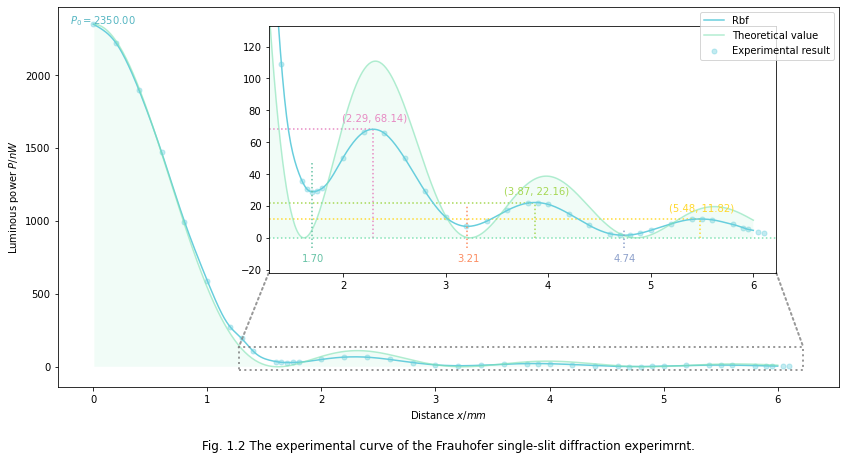

In [12]:
x_dns = np.linspace(0, 6, 601)
itp_func = Rbf(df1['x'], df1['P'])
p_itp = itp_func(x_dns)

top_x_exp = x_dns[argrelextrema(p_itp, np.greater)]
top_p_exp = p_itp[argrelextrema(p_itp, np.greater)]
bot_x_exp = x_dns[argrelextrema(p_itp, np.less)]


fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(df1['x'], df1['P'], s = 25, alpha = 0.4, color='#68CEDD', label = 'Experimental result')
ax.plot(x_dns, p_itp, color='#68CEDD', label = 'Rbf')
ax.plot(x_dns, p_the, alpha = 0.6, color='#7fe2b3', label = 'Theoretical value')
ax.legend()
ax.fill_between(x_dns, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)
ax.annotate('$P_0 = ${:.2f}'.format(P0), xy=(-0.2, P0+5), color='#56B6C2')


subax = ax.inset_axes((0.27, 0.3, 0.65, 0.65))
subax.scatter(df1['x'], df1['P'], s = 25, alpha = 0.4, color='#68CEDD')
subax.plot(x_dns, p_itp, color='#68CEDD')
subax.plot(x_dns, p_the, alpha = 0.6, color='#7fe2b3')
subax.axhline(y = 0, ls=':', color = '#7fe2b3')
subax.fill_between(x_dns, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)

for i in range(3):
    subax.axvline(bot_x_exp[i], 0.1, 0.45-0.25*np.log(i+1), ls=':', color = plt.cm.Set2(i))
    subax.annotate('{:.2f}'.format(bot_x_exp[i]), xy=(bot_x_exp[i]-0.1, -15), color=plt.cm.Set2(i))

    # subax.axvline(top_x_exp[i], 0.1, top_p_exp[i]/150+0.12, ls=':', color = plt.cm.Set2(i+3))
    # subax.axhline(top_p_exp[i], 0, top_x_exp[i]/5-0.25, ls=':', color = plt.cm.Set2(i+3))
    subax.vlines(top_x_exp[i], 0.1, top_p_exp[i], ls=':', color = plt.cm.Set2(i+3))
    subax.hlines(top_p_exp[i], 0, top_x_exp[i], ls=':', color = plt.cm.Set2(i+3))
    subax.annotate('({:.2f}, {:.2f})'.format(top_x_exp[i],top_p_exp[i]), xy=(top_x_exp[i]-0.3, top_p_exp[i]+5), color=plt.cm.Set2(i+3))

zoom(ax, subax, 150, 600, x_dns , [df1['P'], p_itp, p_the], 'top', y_ratio=0.2)

plt.xlabel('Distance $x /mm$')
plt.ylabel('Luminous power $P /nW$')
plt.title('Fig. 1.2 The experimental curve of the Frauhofer single-slit diffraction experimrnt.', y=-0.18)
# plt.savefig(r'B10-Output\Fig.1.2.png', bbox_inches = 'tight', dpi=300)

### Analyze

In [13]:
df1tp = pd.DataFrame({'the': top_p_the, 'exp': top_p_exp})
df1tpr = pd.DataFrame({'the': top_p_the/P0, 'exp': top_p_exp/P0})

df1tp['err'] = ((df1tp['the'] - df1tp['exp'])/df1tp['the']).apply(lambda x: format(x, '.2%')) 
df1tpr['err'] = ((df1tpr['the'] - df1tpr['exp'])/df1tpr['the']).apply(lambda x: format(x, '.2%')) 

print(df1tp, '\n', df1tpr)

          the        exp     err
0  110.890784  68.143629  38.55%
1   38.727635  22.162001  42.77%
2   19.599686  11.817545  39.71% 
         the       exp     err
0  0.047188  0.028997  38.55%
1  0.016480  0.009431  42.77%
2  0.008340  0.005029  39.71%


In [14]:
df1tx = pd.DataFrame({'the': top_x_the, 'exp': top_x_exp})
df1bx = pd.DataFrame({'the': bot_x_the, 'exp': bot_x_exp})
print(df1tx.diff(), '\n', (df1tx.diff()).mean(), '\n', df1bx.diff(), '\n', (df1bx.diff()).mean())

df1tx['err'] = ((df1tx['the'] - df1tx['exp'])/df1tx['the']).apply(lambda x: format(x, '.2%')) 
df1bx['err'] = ((df1bx['the'] - df1bx['exp'])/df1bx['the']).apply(lambda x: format(x, '.2%')) 
print(df1tx, '\n', df1bx)

    the   exp
0   NaN   NaN
1  1.66  1.58
2  1.64  1.61 
 the    1.650
exp    1.595
dtype: float64 
     the   exp
0   NaN   NaN
1  1.62  1.51
2  1.62  1.53 
 the    1.62
exp    1.52
dtype: float64
    the   exp    err
0  2.32  2.29  1.29%
1  3.98  3.87  2.76%
2  5.62  5.48  2.49% 
     the   exp     err
0  1.62  1.70  -4.94%
1  3.24  3.21   0.93%
2  4.86  4.74   2.47%


## EXP2 Verify the validity of the optical power meter

In [4]:
df2 = pd.read_csv(r'B10-Data\validation.csv')
df2['1/Z^2'] = 1/(df2['Z'])**2
print(df2)

     Z     P     1/Z^2
0   20  43.6  0.002500
1   25  31.8  0.001600
2   30  21.2  0.001111
3   35  16.0  0.000816
4   40  12.1  0.000625
5   45   8.6  0.000494
6   50   7.5  0.000400
7   55   5.9  0.000331
8   60   4.9  0.000278
9   65   4.0  0.000237
10  70   3.6  0.000204
11  75   2.9  0.000178
12  80   2.5  0.000156
13  85   2.3  0.000138


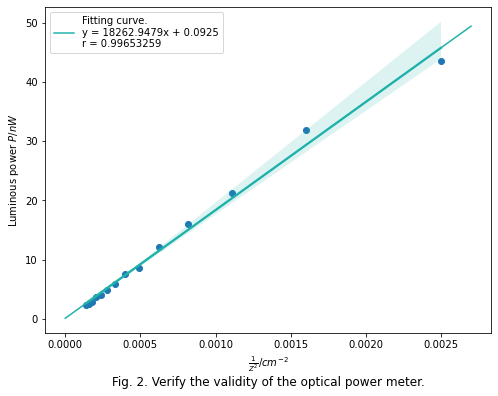

In [16]:
vld_func = np.polyfit(df2['1/Z^2'], df2['P'], deg=1)
z_dns = np.linspace(0, 0.0027, 50)
p_reg = np.polyval(vld_func, z_dns)

r = np.corrcoef(df2['1/Z^2'], df2['P'])[0,1]
A1, A2 = tuple(vld_func)

plt.figure(figsize= (8,6))
plt.scatter(df2['1/Z^2'], df2['P'])
plt.plot(z_dns, p_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.4f}x + {:.4f}\nr = {:.8f}'
                          .format(A1, A2, r))

sns.regplot(x=df2['1/Z^2'], y=df2['P'], color = 'lightseagreen', scatter = False)                          
plt.legend()
plt.xlabel(r'$\frac{1}{Z^2} / cm^{-2}$')
plt.ylabel('Luminous power $P /nW$')
plt.title('Fig. 2. Verify the validity of the optical power meter.', y=-0.18)
plt.savefig(r'B10-Output\Fig.2.png', bbox_inches = 'tight', dpi=300)    

## EXP3 Simulation experiment

In [21]:
df3 = pd.DataFrame((loadmat(r'B10-Data\Simu.mat')['Mod'])**2) ##square!!!!
lim = 9.15
ticks = tuple(str(-round(x, 2)) for x in np.linspace(-lim, lim, 512))
df3.columns = tuple(str(round(x, 2)) for x in np.linspace(-lim, lim, 512))
df3.index = tuple(str(-round(x, 2)) for x in np.linspace(-lim, lim, 512))

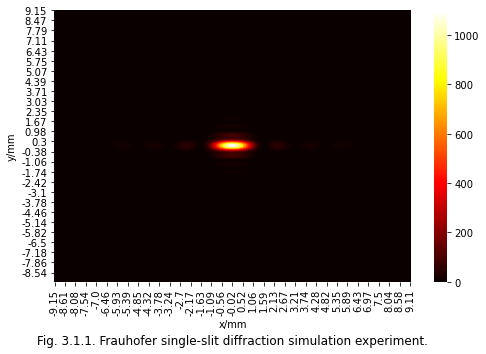

In [18]:
plt.figure(figsize= (8,5))
sns.heatmap(df3, cmap='hot')
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('Fig. 3.1.1. Frauhofer single-slit diffraction simulation experiment.', y=-0.25)
# plt.savefig(r'B10-Output\Fig.3.1.1.png', bbox_inches = 'tight', dpi=600)  

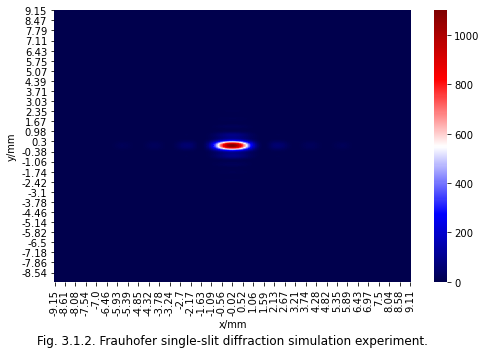

In [19]:
plt.figure(figsize= (8,5))
sns.heatmap(df3, cmap='seismic')
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('Fig. 3.1.2. Frauhofer single-slit diffraction simulation experiment.', y=-0.25)
# plt.savefig(r'B10-Output\Fig.3.1.2.png', bbox_inches = 'tight', dpi=600)  

In [22]:
df4 = df3.iloc[255, 255:].rename_axis('x').reset_index()
df4.columns = ['x', 'P']
df4 = df4.applymap(lambda x:float(x))

C:\Users\12977\AppData\Local\Temp/ipykernel_19852/1902012832.py:5: RuntimeWarning: invalid value encountered in true_divide
  p_the = P0 * (np.sin(np.pi*a*x_dns/(D*lam)))**2 / (np.pi*a*x_dns/(D*lam))**2


Text(0.5, -0.18, 'Fig. 3.2. The simulation curve of the Frauhofer single-slit diffraction experimrnt.')

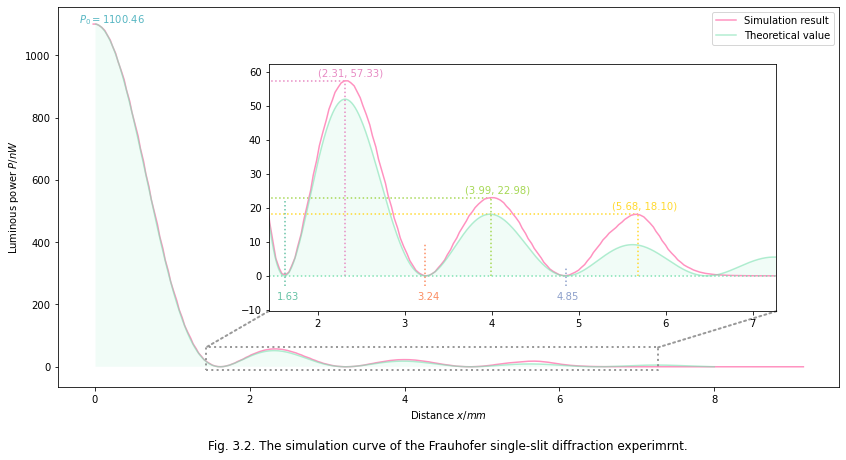

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

x_dns = np.linspace(0, 8, 800)
P0 = df4.iloc[0,1]
p_the = P0 * (np.sin(np.pi*a*x_dns/(D*lam)))**2 / (np.pi*a*x_dns/(D*lam))**2
p_smu = np.array(df4['P'])
x_smu = np.array(df4['x'])

top_x_the = x_dns[argrelextrema(p_the, np.greater)]
top_p_the = p_the[argrelextrema(p_the, np.greater)]
bot_x_the = x_dns[argrelextrema(p_the, np.less)]

top_x_smu = x_smu[argrelextrema(p_smu, np.greater)]
top_p_smu = p_smu[argrelextrema(p_smu, np.greater)]
bot_x_smu = x_smu[argrelextrema(p_smu, np.less)]


ax.plot(df4['x'], df4['P'], color='#FF92C0', label = 'Simulation result')
ax.plot(x_dns, p_the, alpha = 0.6, color='#7fe2b3', label = 'Theoretical value')
ax.legend()
ax.fill_between(x_dns, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)
ax.annotate('$P_0 = ${:.2f}'.format(P0), xy=(-0.2, P0+5), color='#56B6C2')


subax = ax.inset_axes((0.27, 0.2, 0.65, 0.65))
subax.plot(df4['x'], df4['P'], color='#FF92C0')
subax.plot(x_dns, p_the, alpha = 0.6, color='#7fe2b3')
subax.axhline(y = 0, ls=':', color = '#7fe2b3')
subax.fill_between(x_dns, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)

for i in range(3):
    subax.axvline(bot_x_smu[i], 0.1, 0.45-0.25*np.log(i+1), ls=':', color = plt.cm.Set2(i))
    subax.annotate('{:.2f}'.format(bot_x_smu[i]), xy=(bot_x_smu[i]-0.1, -7), color=plt.cm.Set2(i))
    subax.vlines(top_x_smu[i], 0.1, top_p_smu[i], ls=':', color = plt.cm.Set2(i+3))
    subax.hlines(top_p_smu[i], 0, top_x_smu[i], ls=':', color = plt.cm.Set2(i+3))
    subax.annotate('({:.2f}, {:.2f})'.format(top_x_smu[i],top_p_smu[i]), xy=(top_x_smu[i]-0.3, top_p_smu[i]+1.5), color=plt.cm.Set2(i+3))

zoom(ax, subax, 170, 700, x_dns , [p_the], 'top', y_ratio=0.2)

plt.xlabel('Distance $x /mm$')
plt.ylabel('Luminous power $P /nW$')
plt.title('Fig. 3.2. The simulation curve of the Frauhofer single-slit diffraction experimrnt.', y=-0.18)
# plt.savefig(r'B10-Output\Fig.3.2.png', bbox_inches = 'tight', dpi=300)

### Analyze

In [25]:
df1tp = pd.DataFrame({'the': top_p_the[0:3], 'exp': top_p_smu})
df1tpr = pd.DataFrame({'the': top_p_the[0:3]/P0, 'exp': top_p_smu/P0})

df1tp['err'] = ((df1tp['the'] - df1tp['exp'])/df1tp['the']).apply(lambda x: format(x, '.2%')) 
df1tpr['err'] = ((df1tpr['the'] - df1tpr['exp'])/df1tpr['the']).apply(lambda x: format(x, '.2%')) 

print(df1tp, '\n', df1tpr)

         the        exp      err
0  51.929351  57.334587  -10.41%
1  18.134880  22.977563  -26.70%
2   9.177822  18.096673  -97.18% 
         the       exp      err
0  0.047189  0.052101  -10.41%
1  0.016479  0.020880  -26.70%
2  0.008340  0.016445  -97.18%


In [26]:
df4tx = pd.DataFrame({'the': top_x_the[0:3], 'exp': top_x_smu})
df4bx = pd.DataFrame({'the': bot_x_the[0:3], 'exp': bot_x_smu})
print(df4tx.diff(), '\n', (df4tx.diff()).mean(), '\n', df4bx.diff(), '\n', (df4bx.diff()).mean())

df4tx['err'] = ((df4tx['the'] - df4tx['exp'])/df4tx['the']).apply(lambda x: format(x, '.2%')) 
df4bx['err'] = ((df4bx['the'] - df4bx['exp'])/df4bx['the']).apply(lambda x: format(x, '.2%')) 
print(df4tx, '\n', df4bx)

       the   exp
0      NaN   NaN
1  1.67209  1.68
2  1.63204  1.69 
 the    1.652065
exp    1.685000
dtype: float64 
         the   exp
0       NaN   NaN
1  1.612015  1.61
2  1.622028  1.61 
 the    1.617021
exp    1.610000
dtype: float64
        the   exp     err
0  2.312891  2.31   0.12%
1  3.984981  3.99  -0.13%
2  5.617021  5.68  -1.12% 
         the   exp     err
0  1.622028  1.63  -0.49%
1  3.234043  3.24  -0.18%
2  4.856070  4.85   0.13%


## Multiple slits 

In [3]:
theta = np.linspace(0, 0.02, 100)
N = 1
d = 0.3
p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)

C:\Users\12977\AppData\Local\Temp/ipykernel_11084/1187817083.py:4: RuntimeWarning: invalid value encountered in true_divide
  p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)


In [69]:
for idx in range(4):
    N = [1, 2, 3, 4][idx]
    theta = np.linspace(0, 0.01, 1000)
    d = 0.3
    p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)
    p_the = p_the/p_the[1]
    top_x_the = theta[argrelextrema(p_the, np.greater)]
    top_p_the = p_the[argrelextrema(p_the, np.greater)]
    bot_x_the = theta[argrelextrema(p_the, np.less)]


    fig, ax = plt.subplots(1, 1, figsize=(14, 7))

    ax.plot(theta, p_the, color='#7fe2b3')
    ax.fill_between(theta, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)


    subax = ax.inset_axes((0.27, 0.3, 0.65, 0.65))
    subax.plot(theta, p_the, color='#7fe2b3')
    subax.axhline(y = 0, ls=':', color = '#7fe2b3')
    subax.fill_between(theta, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)

    for i in range(3+N-1):
        subax.annotate('{:.2E}'.format(bot_x_the[i]), xy=(bot_x_the[i], -0.005), color=plt.cm.Set2(i))
        subax.vlines(top_x_the[i], 0, top_p_the[i], ls=':', color = plt.cm.Set2(i))
        subax.hlines(top_p_the[i], 0, top_x_the[i], ls=':', color = plt.cm.Set2(i))
        subax.annotate('({:.2E}, {:.2E})'.format(top_x_the[i],top_p_the[i]), xy=(top_x_the[i], top_p_the[i]), color=plt.cm.Set2(i))

    zoom(ax, subax, 200 - N*35, 750- N*80, theta , [p_the], 'top', y_ratio=0.2)

    plt.xlabel('Distance $x /mm$')
    plt.ylabel(r'Relative intensity $\frac{I_{\theta}}{I_0}$')
    plt.title('Fig. 4.{} Fraunhofer multi-slit diffraction. N={}.'.format(idx+1, N), y=-0.18)
    plt.savefig('B10-Output\Fig.4.{}.png'.format(idx+1), bbox_inches = 'tight', dpi=300)
    plt.clf()

C:\Users\12977\AppData\Local\Temp/ipykernel_11084/1855450271.py:5: RuntimeWarning: invalid value encountered in true_divide
  p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)
C:\Users\12977\AppData\Local\Temp/ipykernel_11084/1855450271.py:5: RuntimeWarning: invalid value encountered in true_divide
  p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)
C:\Users\12977\AppData\Local\Temp/ipykernel_11084/1855450271.py:5: RuntimeWarning: invalid value encountered in true_divide
  p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)
C:\Users\12977\AppData\Local\Temp/ipykernel_11084/1855450271.py:5: RuntimeWarning: invalid value encountered in true_divide
  p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) 

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

C:\Users\12977\AppData\Local\Temp/ipykernel_11084/718145913.py:4: RuntimeWarning: invalid value encountered in true_divide
  p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)


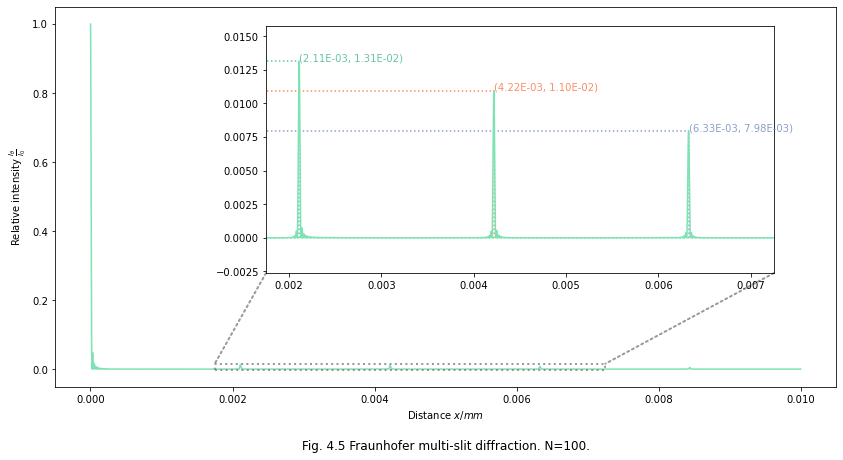

In [70]:
theta = np.linspace(0, 0.01, 10000)
N = 100
d = 0.3
p_the = ((np.sin(np.pi*a*theta/(lam)))**2 / (np.pi*a*theta/(lam))**2) * ((np.sin(N*np.pi*d*theta/(lam)))**2 / np.sin(np.pi*d*theta/(lam))**2)
p_the = p_the/p_the[1]
top_x_the = theta[argrelextrema(p_the, np.greater, order = 1000)]
top_p_the = p_the[argrelextrema(p_the, np.greater, order = 1000)]
bot_x_the = theta[argrelextrema(p_the, np.less, order = 1000)]


fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(theta, p_the, color='#7fe2b3')
ax.fill_between(theta, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)


subax = ax.inset_axes((0.27, 0.3, 0.65, 0.65))
subax.plot(theta, p_the, color='#7fe2b3')
subax.axhline(y = 0, ls=':', color = '#7fe2b3')
subax.fill_between(theta, 0, p_the, facecolor='#7fe2b3', interpolate=True, alpha = 0.1)

for i in range(3):
    subax.vlines(top_x_the[i], 0, top_p_the[i], ls=':', color = plt.cm.Set2(i))
    subax.hlines(top_p_the[i], 0, top_x_the[i], ls=':', color = plt.cm.Set2(i))
    subax.annotate('({:.2E}, {:.2E})'.format(top_x_the[i],top_p_the[i]), xy=(top_x_the[i], top_p_the[i]), color=plt.cm.Set2(i))

zoom(ax, subax, 2000, 7000, theta , [p_the], 'top', y_ratio=0.2)

plt.xlabel('Distance $x /mm$')
plt.ylabel(r'Relative intensity $\frac{I_{\theta}}{I_0}$')
plt.title('Fig. 4.5 Fraunhofer multi-slit diffraction. N=100.', y=-0.18)
plt.savefig('B10-Output\Fig.4.5.png', bbox_inches = 'tight', dpi=300)